# Arxiv Papers
[source](https://arxiv.org/help/bulk_data)

In [29]:
import urllib.request

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=10'
data = urllib.request.urlopen(url).read().strip()

In [30]:
type(data)

bytes

In [33]:
data

b'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D10" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=10</title>\n  <id>http://arxiv.org/api/WyBPOs+pRgzCTXTMWhtnbcOmk6g</id>\n  <updated>2019-06-26T00:00:00-04:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">146428</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">10</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>\n    <updated>2001-02-28T20:12:09Z</updated>\n    <published>2001-02-28T20:12:09Z</published>\n    <title>Impact of Electron-Electro

In [12]:
)import xml.etree.ElementTree as ET

In [14]:
root = ET.fromstring(data)

In [15]:
root.

<Element '{http://www.w3.org/2005/Atom}feed' at 0x7fd004201368>

In [28]:
for child in root:
    print(' ',child.tag)
    for c in child:
        print(c.tag, c.text)

  {http://www.w3.org/2005/Atom}link
  {http://www.w3.org/2005/Atom}title
  {http://www.w3.org/2005/Atom}id
  {http://www.w3.org/2005/Atom}updated
  {http://a9.com/-/spec/opensearch/1.1/}totalResults
  {http://a9.com/-/spec/opensearch/1.1/}startIndex
  {http://a9.com/-/spec/opensearch/1.1/}itemsPerPage
  {http://www.w3.org/2005/Atom}entry
{http://www.w3.org/2005/Atom}id http://arxiv.org/abs/cond-mat/0102536v1
{http://www.w3.org/2005/Atom}updated 2001-02-28T20:12:09Z
{http://www.w3.org/2005/Atom}published 2001-02-28T20:12:09Z
{http://www.w3.org/2005/Atom}title Impact of Electron-Electron Cusp on Configuration Interaction Energies
{http://www.w3.org/2005/Atom}summary   The effect of the electron-electron cusp on the convergence of configuration
interaction (CI) wave functions is examined. By analogy with the
pseudopotential approach for electron-ion interactions, an effective
electron-electron interaction is developed which closely reproduces the
scattering of the Coulomb interaction but 

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [105]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

In [108]:
tot = []
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        tot.append(len(df))

In [100]:
tot[0]['categories'][0].split(' ')

['math.st', 'cs.lg', 'math.pr', 'stat.ap', 'stat.th']

## Data distribution analysis

### By year

In [16]:
year = ['20{:02d}'.format(i) for i in range(9,20)]
year

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [39]:
year_paper_count = dict()

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        year_paper_count[y] += len(data)

In [44]:
df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})

## Note that 2019 is only for 6 months span

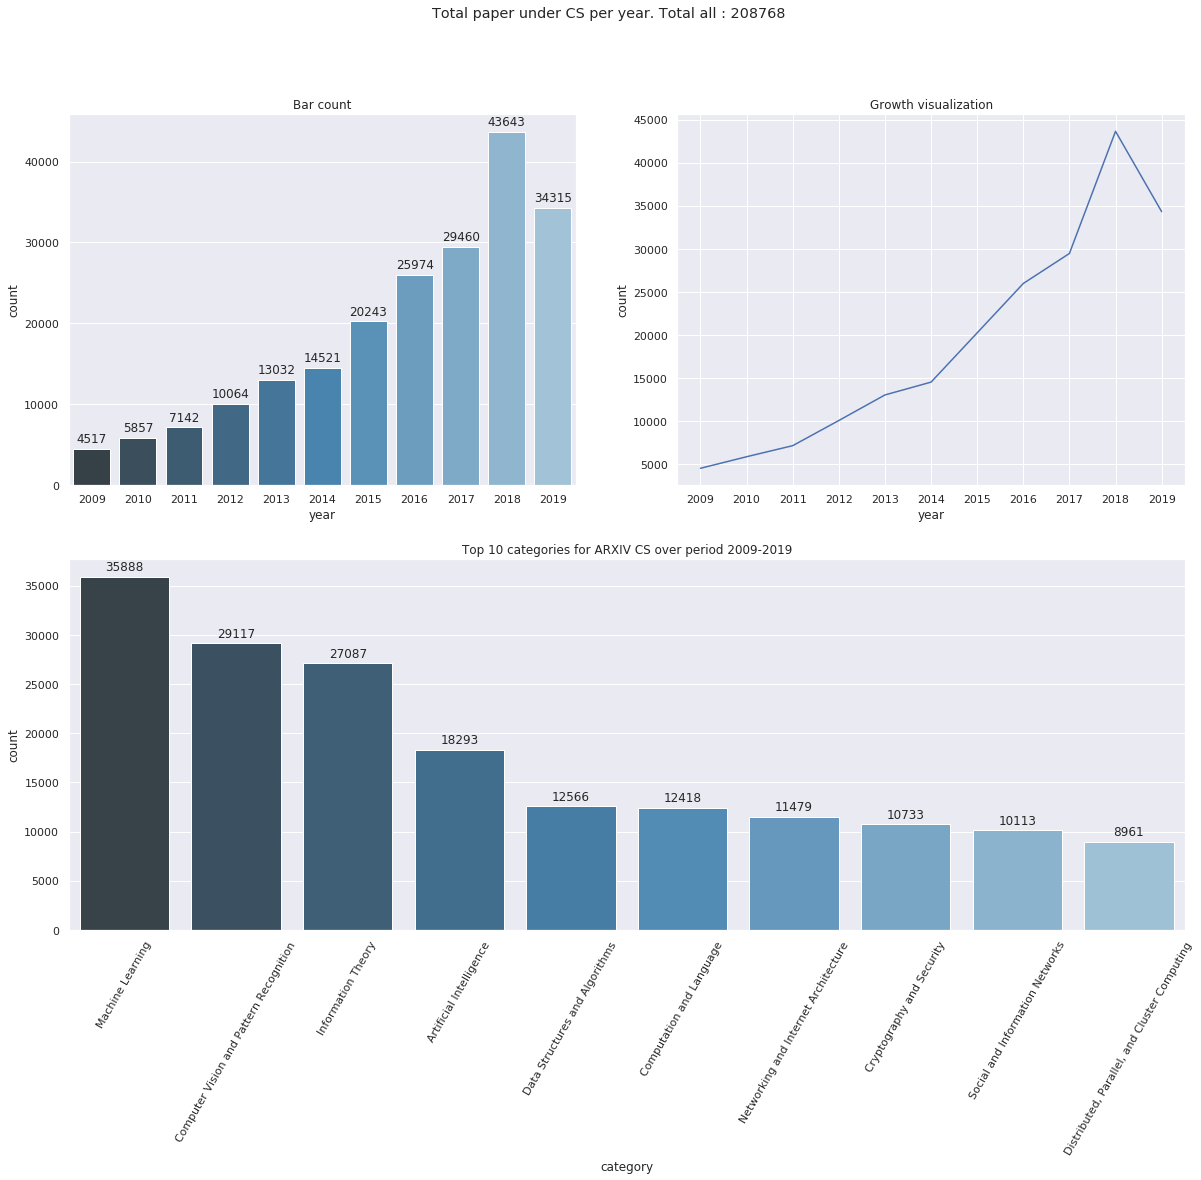

In [189]:
plt.figure(figsize=(20,15))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(np.sum(tot)))

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [132]:

# Per categories
# TODO : count each categories. Use Python Counter
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        # categories
        data = data['categories']
        for d in data:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1


In [133]:
len(categories_count)

40

In [134]:
list(categories_count.items())

[('cs.it', 27087),
 ('cs.lg', 35888),
 ('cs.cy', 5949),
 ('cs.ir', 5475),
 ('cs.ds', 12566),
 ('cs.lo', 8640),
 ('cs.dm', 7399),
 ('cs.ar', 1226),
 ('cs.cc', 5838),
 ('cs.ni', 11479),
 ('cs.gt', 5315),
 ('cs.oh', 1487),
 ('cs.mm', 2055),
 ('cs.cr', 10733),
 ('cs.cv', 29117),
 ('cs.ne', 6096),
 ('cs.na', 2783),
 ('cs.ms', 1195),
 ('cs.ma', 2329),
 ('cs.gr', 1523),
 ('cs.dc', 8961),
 ('cs.cl', 12418),
 ('cs.ai', 18293),
 ('cs.dl', 2606),
 ('cs.hc', 3912),
 ('cs.ce', 2837),
 ('cs.sc', 1317),
 ('cs.cg', 3596),
 ('cs.fl', 2735),
 ('cs.pl', 3652),
 ('cs.db', 3947),
 ('cs.ro', 6431),
 ('cs.se', 5672),
 ('cs.pf', 1725),
 ('cs.sd', 2520),
 ('cs.gl', 107),
 ('cs.os', 400),
 ('cs.si', 10113),
 ('cs.sy', 8648),
 ('cs.et', 1580)]

In [161]:
# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

In [165]:
categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)

In [159]:
type(categories)

list

In [166]:
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

In [167]:
df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

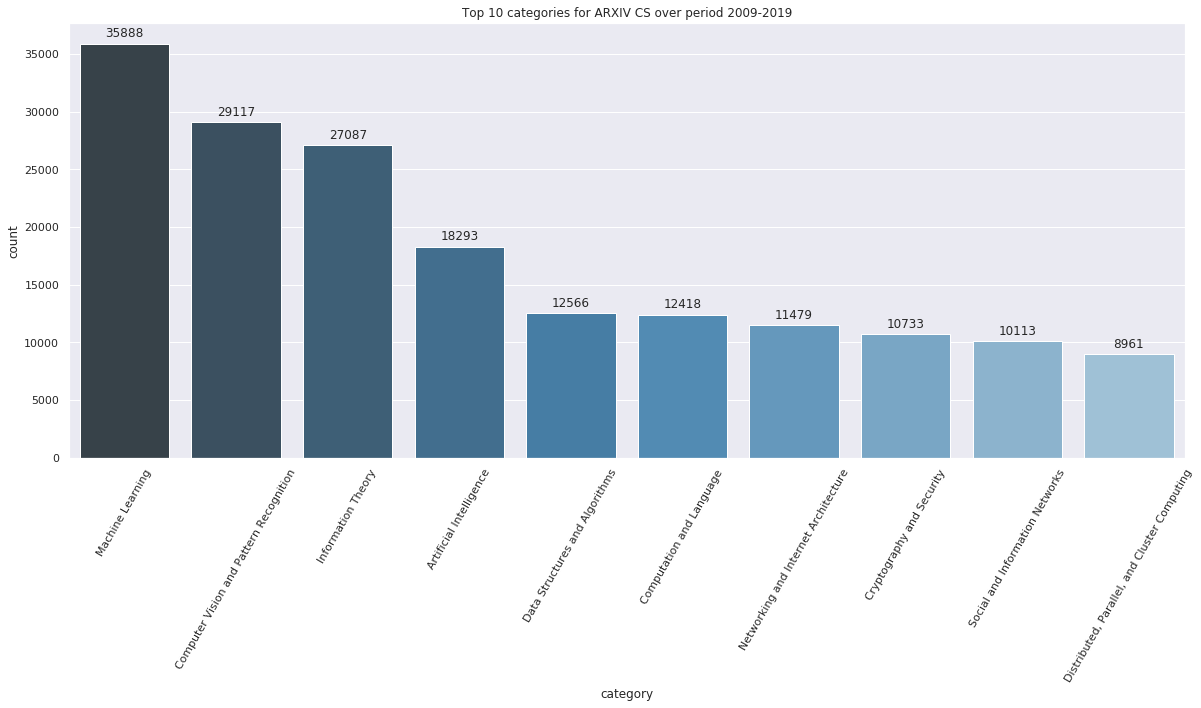

In [185]:
plt.figure(figsize=(20, 8))
plt.title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
